

The datasets used in this notebook can be found in the google drive link below -

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing



Import all the libraries you require in the cell below.



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import tree

### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

In [ ]:
df=pd.read_csv('mushrooms.csv')
df2 = pd.get_dummies(df)
df3 = df2
df3 = df3.drop(['class_e', 'class_p'], axis=1)
X = df3
y = df2['class_e']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=2020)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[1172    3]
 [   0 1263]]


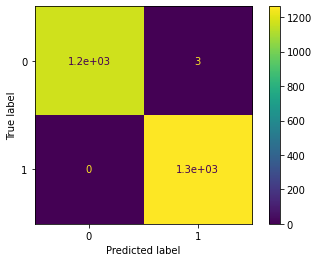

In [ ]:
cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

3. Print the accuracy on the training partition?  (2 marks)


In [ ]:
training_pred = dt.predict(X_train)
acc_training = accuracy_score(training_pred, y_train)
print("Accuracy on Training partition:",acc_training)

Accuracy on Training partition: 0.9998241294407316


4. Print the accuracy on the test partition? (2 marks)


In [ ]:
# Enter your code here
acc_testing = accuracy_score(y_pred, y_test)
print("Accuracy on Testing partition:",acc_testing)

Accuracy on Testing partition: 0.9987694831829368


5. Show the classification tree and save it (5 marks)


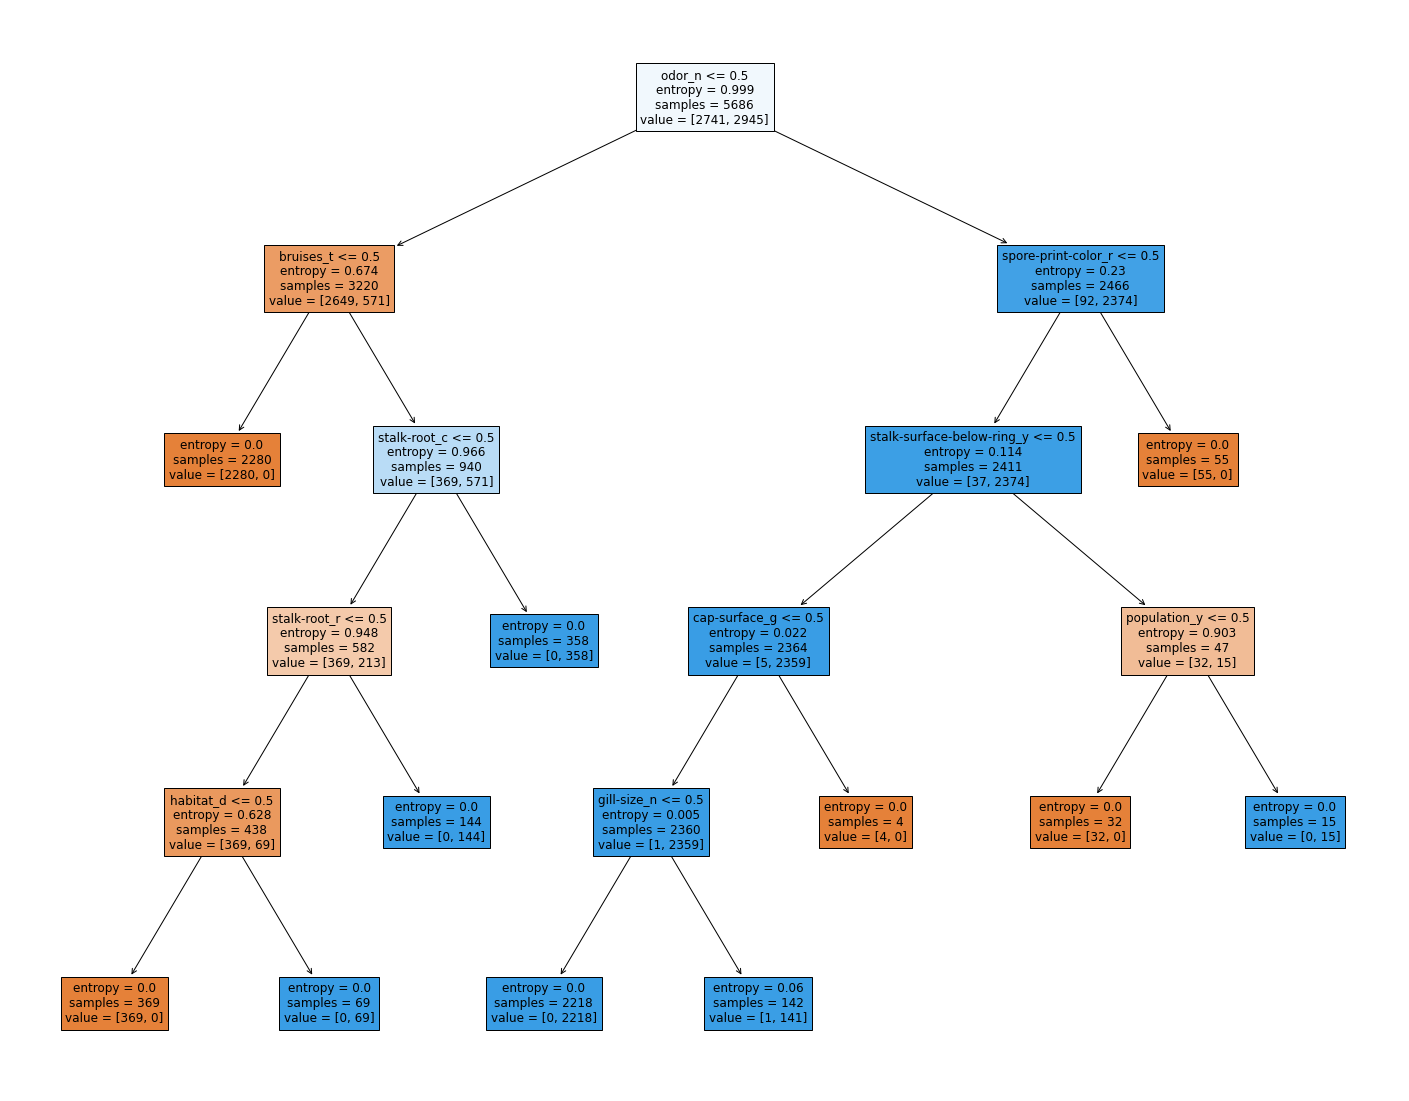

In [ ]:
# Enter your code here
fig = plt.figure(figsize=(25,20))
fn = X.columns
irisTree = tree.plot_tree(dt, feature_names=fn, filled=True)
plt.savefig('MushroomDT.png')
plt.show()

6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [ ]:
feature_importances = dt.feature_importances_
features = X_train.columns
dff = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest
print(dff)

<bound method DataFrame.nlargest of         features  importance
0    cap-shape_b         0.0
1    cap-shape_c         0.0
2    cap-shape_f         0.0
3    cap-shape_k         0.0
4    cap-shape_s         0.0
..           ...         ...
112    habitat_l         0.0
113    habitat_m         0.0
114    habitat_p         0.0
115    habitat_u         0.0
116    habitat_w         0.0

[117 rows x 2 columns]>


7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [ ]:
# added new mushroom to original data frame, then repeated predictions
# looks at the last element's prediction, which is the above mushroom. It is poisonous
d = {'class' : ['na'], 'cap-shape' : ['x'], 'cap-surface' : ['s'], 'cap-color' : ['n'], 'bruises' : ['t'], 'odor' : ['y'], 'gill-attachment' : ['f'], 'gill-spacing' : ['c'], 'gill-size' : ['n'], 'gill-color' : ['k'], 'stalk-shape' : ['e'], 'stalk-root' : ['e'], 'stalk-surface-above-ring' : ['s'], 'stalk-surface-below-ring' : ['s'], 'stalk-color-above-ring' : ['w'], 'stalk-color-below-ring' : ['w'], 'veil-type' : ['p'], 'veil-color' : ['w'], 'ring-number' : ['o'], 'ring-type' : ['p'], 'spore-print-color' : ['r'], 'population' : ['s'], 'habitat' : ['u']}
mushdf = pd.DataFrame(d)
df.append(mushdf)
df2 = pd.get_dummies(df)
df3 = df2
df3 = df3.drop(['class_e', 'class_p'], axis=1)
X = df3
y = df2['class_e']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=2020)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# last element is unedible/posionous
print(y_pred[len(y_pred)-1])

0
